In [1]:
from scipy.cluster.hierarchy import centroid, fcluster
from scipy.spatial.distance import pdist
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import nltk
stopwords=stopwords.words('english')
from tqdm import tqdm

In [2]:
def contains_stopwords(text):
    words = text.split()
    return any(word.lower() in stopwords for word in words)

In [3]:
df=pd.read_feather('../../anti-tom-data/anti-tom-no-masking.feather')

In [4]:
df.shape

(1652083, 773)

In [5]:
df=df[~df['word'].apply(contains_stopwords)]
df.shape

(648635, 773)

In [6]:
df=df[df['word'].str.len()>=2]

In [7]:
df.shape

(638197, 773)

In [8]:
def calculate_centroid(points):
    num_points = len(points)
    sum_x = sum(point[0] for point in points)
    sum_y = sum(point[1] for point in points)
    centroid_x = sum_x / num_points
    centroid_y = sum_y / num_points
    return (centroid_x, centroid_y)

In [9]:
centroid_coordinates={}
for k in df['title'].unique():
    centroid_coordinates[k]=calculate_centroid(np.array(df[df['title'] == k][['x', 'y']]))

In [10]:
centroid_df=pd.DataFrame.from_dict(centroid_coordinates).T
centroid_df.reset_index(inplace=True)
centroid_df.columns=['title','x','y']

In [11]:
centroid_df['title'].unique()

array(['randolph.txt', 'mcintosh.txt', 'vidi.txt', 'wiley.txt',
       'burwell.txt', 'butt.txt', 'estes.txt', 'hall.txt', 'eastman.txt',
       'chase.txt', 'smith.txt', 'schoolcraft.txt', 'criswell.txt',
       'cowdin.txt', 'page.txt', 'flanders.txt', 'hentz.txt', 'rush.txt',
       'cozans.txt', 'simms.txt', 'hale.txt', 'uncle-tom.txt'],
      dtype=object)

In [12]:
centroid_df_non_uncle_tom=centroid_df[centroid_df['title']!='uncle-tom.txt']
centroid_df_uncle_tom=centroid_df[centroid_df['title']=='uncle-tom.txt']

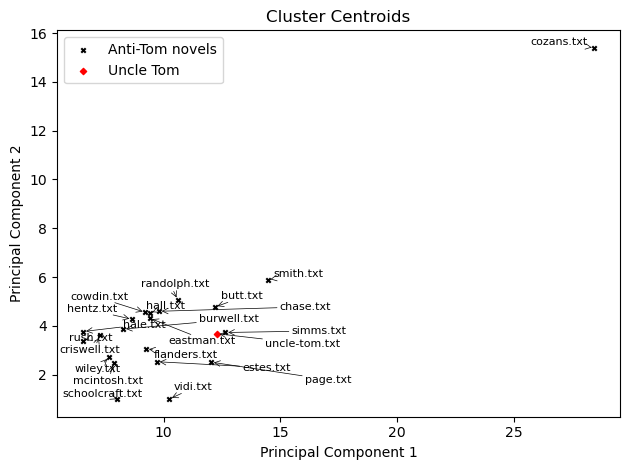

In [13]:
import matplotlib.pyplot as plt
from adjustText import adjust_text
plt.scatter(
    centroid_df_non_uncle_tom['x'], centroid_df_non_uncle_tom['y'],
    marker='x', c='black', s=10, alpha=1, label='Anti-Tom novels'
)
plt.scatter(
    centroid_df_uncle_tom['x'], centroid_df_uncle_tom['y'],
    marker='D', c='red', s=10, alpha=1, label='Uncle Tom'
)

annotations = [
    plt.annotate(title, (x, y), fontsize=8)
    for x, y, title in zip(centroid_df['x'], centroid_df['y'], centroid_df['title'])
]
adjust_text(
    annotations, 
    arrowprops=dict(arrowstyle="->", color='black', lw=0.5),
    expand_points=(1.2, 1.2),
    expand_text=(1.2, 1.2),
    force_text=(0.5, 0.5),
    lim=1000,
    only_move={'points':'xy', 'text':'xy'}
)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Cluster Centroids')
plt.legend()
plt.tight_layout()  
# plt.savefig('figure/anti-tom-centroids.png', dpi=300, bbox_inches='tight')
plt.show()

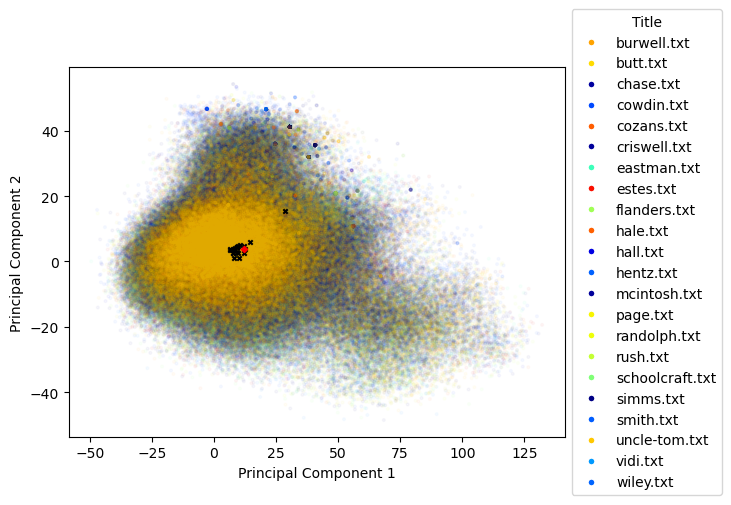

In [14]:
import matplotlib.pyplot as plt
import random

# Assuming you have the necessary data and variables defined

# Get unique titles
unique_titles = df['title'].unique()

# Generate 21 distinct random colors
num_colors = len(unique_titles)
random.seed(42)  # for reproducibility
colors = [plt.cm.jet(random.random()) for _ in range(num_colors)]

# Map titles to corresponding colors
title_to_color = {title: color for title, color in zip(unique_titles, colors)}
df['title_color'] = df['title'].map(title_to_color)

# Create a scatter plot using Matplotlib with distinct random colors and adjusted alpha
plt.scatter(df['x'], df['y'], c=df['title_color'], s=4, alpha=0.03)
plt.scatter(centroid_df[centroid_df['title'] != 'uncle-tom.txt']['x'], centroid_df[centroid_df['title'] != 'uncle-tom.txt']['y'], marker='x', c='black', s=10, alpha=1)
plt.scatter(centroid_df[centroid_df['title'] == 'uncle-tom.txt']['x'], centroid_df[centroid_df['title'] == 'uncle-tom.txt']['y'], marker='D', c='red', s=10, alpha=1)

# Add labels and title
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Create legend handles sorted alphabetically by title
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=5, label=title)
                  for title, color in sorted(title_to_color.items(), key=lambda item: item[0])]  # Sort by title

# Add a legend to the right
plt.legend(handles=legend_handles, title='Title', loc='center left', bbox_to_anchor=(1, 0.5))

# Display the plot
# plt.savefig('figure/anti-tom-BERT.png', bbox_inches='tight', dpi=300)
plt.show()


In [15]:
centroid_df

,title,x,y
0,randolph.txt,10.597980,5.057677
1,mcintosh.txt,7.848468,2.494900
2,vidi.txt,10.237205,0.998772
3,wiley.txt,7.652302,2.724900
4,burwell.txt,8.255600,3.864576
5,butt.txt,12.186053,4.770498
6,estes.txt,9.703812,2.528634
7,hall.txt,9.403896,4.519151
8,eastman.txt,9.393367,4.314376
9,chase.txt,9.791724,4.595949


In [16]:
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import cosine_distances

uncle_tom_coords = centroid_df.loc[centroid_df['title'] == 'uncle-tom.txt', ['x', 'y']].values[0]  
centroid_df['cosine_distance'] = centroid_df.apply(lambda row: cosine_distances([uncle_tom_coords], [row[['x', 'y']]])[0][0], axis=1)
centroid_df['euclidean_distance'] = centroid_df.apply(lambda row: euclidean_distances([uncle_tom_coords], [row[['x', 'y']]])[0][0], axis=1)
# centroid_df['cosine_all']=centroid_df.apply(lambda row: cosine_distances([uncle_tom_coords], [row[['0', '1']]])[0][0], axis=1)

In [17]:
centroid_df.sort_values(by=['cosine_distance'], ascending=False)

,title,x,y,cosine_distance,euclidean_distance
20,hale.txt,6.549085,3.766663,2.648503e-02,5.720462
18,cozans.txt,28.459842,15.396032,2.085934e-02,19.986333
2,vidi.txt,10.237205,0.998772,1.876359e-02,3.362646
17,rush.txt,6.521099,3.383868,1.750484e-02,5.755300
12,criswell.txt,7.253378,3.626756,1.482003e-02,5.015751
13,cowdin.txt,9.207236,4.553156,1.407461e-02,3.184177
11,schoolcraft.txt,7.979335,0.992990,1.399037e-02,5.060715
16,hentz.txt,8.642917,4.265975,1.394873e-02,3.673266
7,hall.txt,9.403896,4.519151,1.225196e-02,2.985818
0,randolph.txt,10.597980,5.057677,1.183271e-02,2.166702


In [18]:
centroid_df.sort_values(by=['euclidean_distance'], ascending=False)

,title,x,y,cosine_distance,euclidean_distance
18,cozans.txt,28.459842,15.396032,2.085934e-02,19.986333
17,rush.txt,6.521099,3.383868,1.750484e-02,5.755300
20,hale.txt,6.549085,3.766663,2.648503e-02,5.720462
11,schoolcraft.txt,7.979335,0.992990,1.399037e-02,5.060715
12,criswell.txt,7.253378,3.626756,1.482003e-02,5.015751
3,wiley.txt,7.652302,2.724900,1.290560e-03,4.713977
1,mcintosh.txt,7.848468,2.494900,1.361770e-04,4.576056
4,burwell.txt,8.255600,3.864576,1.071745e-02,4.017586
16,hentz.txt,8.642917,4.265975,1.394873e-02,3.673266
2,vidi.txt,10.237205,0.998772,1.876359e-02,3.362646


The most far away point

In [19]:
df.reset_index(drop=True, inplace=True)

In [20]:
centroid_df[centroid_df['title']=='uncle-tom.txt'][['x', 'y']].values[0]

array([12.26886437,  3.67827814])

In [21]:
distances = np.linalg.norm(df[['x', 'y']] - centroid_df[centroid_df['title']=='uncle-tom.txt'][['x', 'y']].values[0], axis=1)

In [22]:
pd.DataFrame.from_dict({'from uncle-tom': distances}).sort_values(by='from uncle-tom', ascending=False).index

Index([140307, 243735, 276484, 554193, 368072, 477059, 500946, 156408, 189526,
       234300,
       ...
        70497, 529453, 244675, 357697, 440175, 479687, 508195, 243994,  35813,
       513341],
      dtype='int64', length=638197)

In [52]:
ten_p=df.shape[0]*.3
## 30%
ten=df.iloc[list(pd.DataFrame.from_dict({'from uncle-tom': distances}).sort_values(by='from uncle-tom', ascending=False).index)][0:int(ten_p)]

In [53]:
len_title={}
for i in df['title'].unique():
    len_title[i]=df[df['title']==i].shape[0]

In [54]:
ten_p_df=pd.DataFrame(df.loc[pd.DataFrame.from_dict({'from uncle-tom': distances}).sort_values(by='from uncle-tom', ascending=False).index][0:int(ten_p)].groupby('title').count()['x']).reset_index()
ten_p_df.columns=['title', 'ten_p']

In [55]:
len_df=pd.DataFrame.from_dict(len_title, orient='index').reset_index().rename(columns={'index':'title', 0:'count'})

In [56]:
ten_p_merged=pd.merge(ten_p_df, len_df, on='title')
ten_p_merged['percent'] = ten_p_merged['ten_p'] / ten_p_merged['count']

In [57]:
ten_p_merged

,title,ten_p,count,percent
0,burwell.txt,2637,8754,0.301234
1,butt.txt,7484,21625,0.346081
2,chase.txt,11041,39180,0.281802
3,cowdin.txt,3974,13550,0.293284
4,cozans.txt,4,21,0.190476
5,criswell.txt,1698,5645,0.300797
6,eastman.txt,7142,25815,0.276661
7,estes.txt,12627,43764,0.288525
8,flanders.txt,4269,14330,0.297906
9,hale.txt,5950,19317,0.308019


In [58]:
def jaccard_similarity(set_A, set_B):
    """
    Calculate Jaccard similarity between two sets.
    
    Parameters:
        set_A (set): First set.
        set_B (set): Second set.
        
    Returns:
        float: Jaccard similarity value between 0 and 1.
    """
    intersection_size = len(set_A.intersection(set_B))
    union_size = len(set_A.union(set_B))
    
    if union_size == 0:
        return 0.0  # To handle cases where both sets are empty
    
    jaccard_similarity = intersection_size / union_size
    return jaccard_similarity

In [59]:
jaccard_dict={}
for i in ten['title'].unique():
    set_a= set(ten[ten['title']==i]['word'])
    set_b= set(ten[ten['title']=='uncle-tom.txt']['word'])
    jaccard_dict[i]=jaccard_similarity(set_a, set_b)

In [60]:
jaccard_df=pd.DataFrame.from_dict(jaccard_dict, orient='index').reset_index().rename(columns={'index':'title', 0:'jaccard'})

In [61]:
pd.merge(ten_p_merged, jaccard_df, on='title').sort_values('jaccard', ascending=False)

,title,ten_p,count,percent,jaccard
19,uncle-tom.txt,21112,69010,0.305927,1.000000
11,hentz.txt,11816,44171,0.267506,0.424706
17,simms.txt,22265,68920,0.323056,0.400293
18,smith.txt,14712,41379,0.355543,0.392991
16,schoolcraft.txt,13847,50713,0.273046,0.388800
7,estes.txt,12627,43764,0.288525,0.383742
6,eastman.txt,7142,25815,0.276661,0.364395
14,randolph.txt,8152,26223,0.310872,0.361446
2,chase.txt,11041,39180,0.281802,0.357464
15,rush.txt,6746,25601,0.263505,0.338787


The closest point

In [43]:
ten_p=df.shape[0]*.3
## 30%
nine=df.iloc[list(pd.DataFrame.from_dict({'from uncle-tom': distances}).sort_values(by='from uncle-tom', ascending=True).index)][0:int(ten_p)]

In [44]:
len_title={}
for i in df['title'].unique():
    len_title[i]=df[df['title']==i].shape[0]

In [45]:
nine_p_df=pd.DataFrame(df.loc[pd.DataFrame.from_dict({'from uncle-tom': distances}).sort_values(by='from uncle-tom', ascending=True).index][0:int(ten_p)].groupby('title').count()['x']).reset_index()
nine_p_df.columns=['title', 'nine_p']

In [46]:
len_df=pd.DataFrame.from_dict(len_title, orient='index').reset_index().rename(columns={'index':'title', 0:'count'})

In [47]:
nine_p_merged=pd.merge(nine_p_df, len_df, on='title')
nine_p_merged['percent'] = nine_p_merged['nine_p'] / ten_p_merged['count']

In [48]:
nine_p_merged

,title,nine_p,count,percent
0,burwell.txt,2632,8754,0.300663
1,butt.txt,5706,21625,0.263861
2,chase.txt,11696,39180,0.298520
3,cowdin.txt,4205,13550,0.310332
4,cozans.txt,1,21,0.047619
5,criswell.txt,1574,5645,0.278831
6,eastman.txt,8101,25815,0.313810
7,estes.txt,13818,43764,0.315739
8,flanders.txt,4335,14330,0.302512
9,hale.txt,5428,19317,0.280996


In [49]:
jaccard_dict_nine={}
for i in ten['title'].unique():
    set_a= set(nine[nine['title']==i]['word'])
    set_b= set(nine[nine['title']=='uncle-tom.txt']['word'])
    jaccard_dict_nine[i]=jaccard_similarity(set_a, set_b)

In [50]:
jaccard_df_nine=pd.DataFrame.from_dict(jaccard_dict_nine, orient='index').reset_index().rename(columns={'index':'title', 0:'jaccard'})

In [51]:
pd.merge(nine_p_merged, jaccard_df_nine, on='title').sort_values('jaccard', ascending=False)

,title,nine_p,count,percent,jaccard
19,uncle-tom.txt,20845,69010,0.302058,1.000000
11,hentz.txt,14071,44171,0.318557,0.444761
17,simms.txt,19624,68920,0.284736,0.422756
7,estes.txt,13818,43764,0.315739,0.418308
16,schoolcraft.txt,16146,50713,0.318380,0.412551
18,smith.txt,10986,41379,0.265497,0.397412
2,chase.txt,11696,39180,0.298520,0.387332
6,eastman.txt,8101,25815,0.313810,0.377461
14,randolph.txt,7524,26223,0.286924,0.373115
12,mcintosh.txt,10028,31203,0.321379,0.373106
